## Instagram Reach Analysis

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

## EDA of Data

In [2]:
# load dataset
data = pd.read_csv("Instagram.csv", encoding = 'latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0       3920.0     2586.0         1028.0         619.0        56.0   98.0   
1       5394.0     2727.0         1838.0        1174.0        78.0  194.0   
2       4021.0     2085.0         1188.0           0.0       533.0   41.0   
3       4528.0     2700.0          621.0         932.0        73.0  172.0   
4       2518.0     1704.0          255.0         279.0        37.0   96.0   

   Comments  Shares  Likes  Profile Visits  Follows  \
0       9.0     5.0  162.0            35.0      2.0   
1       7.0    14.0  224.0            48.0     10.0   
2      11.0     1.0  131.0            62.0     12.0   
3      10.0     7.0  213.0            23.0      8.0   
4       5.0     4.0  123.0             8.0      0.0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [4]:
# check for NaNs
data.isnull().sum()

Impressions       1
From Home         1
From Hashtags     1
From Explore      1
From Other        1
Saves             1
Comments          1
Shares            1
Likes             1
Profile Visits    1
Follows           1
Caption           1
Hashtags          1
dtype: int64

In [5]:
# there is a NaN in every column, drop the values:
data = data.dropna()

In [6]:
# check column info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Impressions     99 non-null     float64
 1   From Home       99 non-null     float64
 2   From Hashtags   99 non-null     float64
 3   From Explore    99 non-null     float64
 4   From Other      99 non-null     float64
 5   Saves           99 non-null     float64
 6   Comments        99 non-null     float64
 7   Shares          99 non-null     float64
 8   Likes           99 non-null     float64
 9   Profile Visits  99 non-null     float64
 10  Follows         99 non-null     float64
 11  Caption         99 non-null     object 
 12  Hashtags        99 non-null     object 
dtypes: float64(11), object(2)
memory usage: 10.8+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


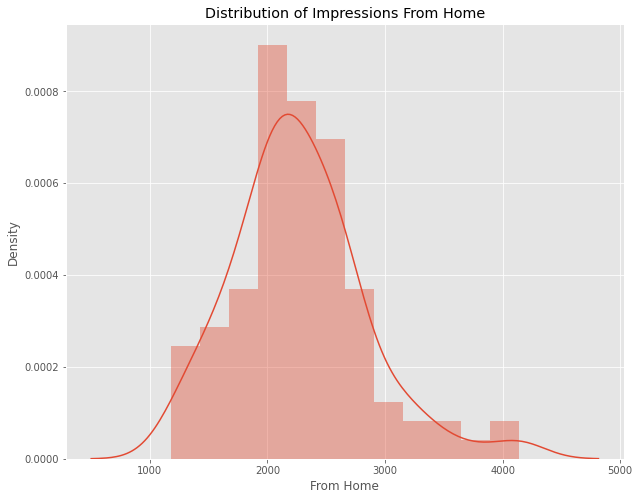

In [7]:
plt.figure(figsize=(10, 8))
plt.style.use('ggplot')
plt.title("Distribution of Impressions from Home")
sns.distplot(data['From Home'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


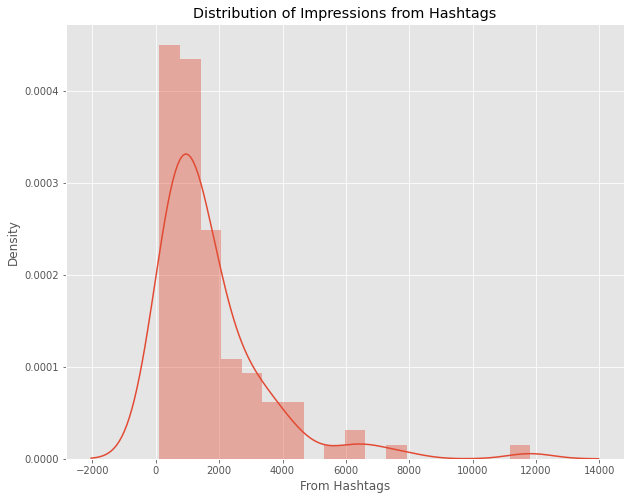

In [8]:
# check the impressions from hashtags

plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions from Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


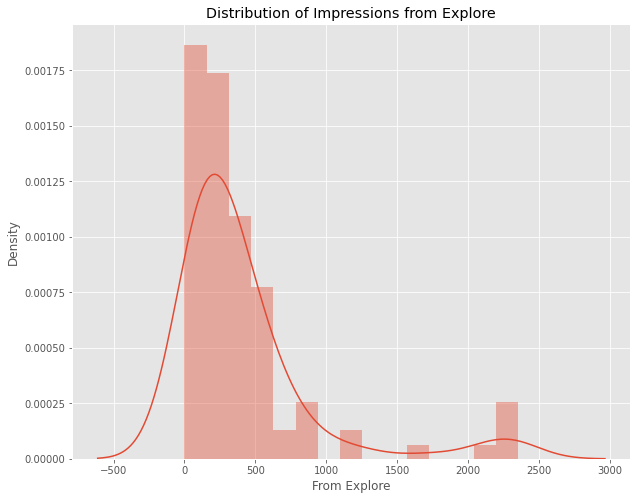

In [9]:
# check the impressions from Explore
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions from Explore")
sns.distplot(data['From Explore'])
plt.show()

In [ ]:
# check the proportions from various sources on instagram

In [11]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts from Various Sources', hole=0.5)
fig.show()

## Analysing Content

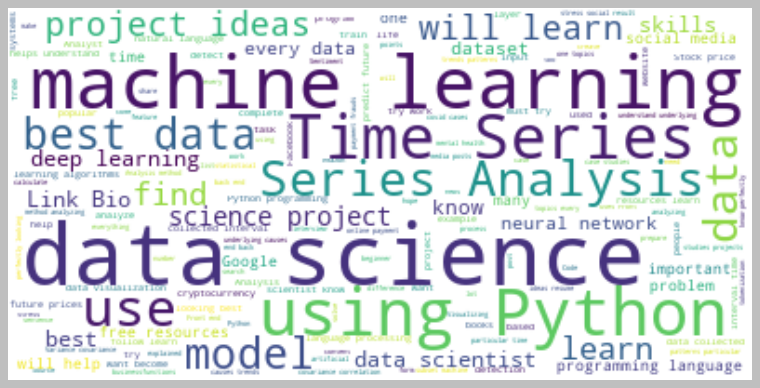

In [12]:
#produce a word colour of most used words in captions
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

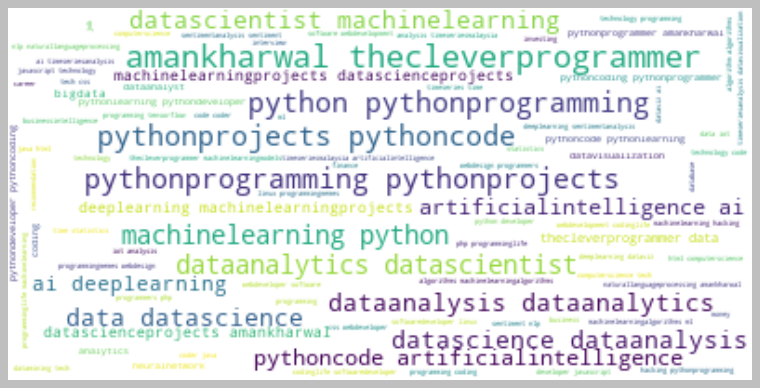

In [13]:
# most used hashtags
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
# analyse the relationships between the number of likes and the number of impressions
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [15]:
# the relationship between the number of comments and total impressions
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

In [16]:
# relaationship between post saves and total impressions
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

In [17]:
# analyse the correlation between columns with the impressions
correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
Likes             0.896277
From Hashtags     0.892682
Follows           0.804064
Profile Visits    0.774393
Saves             0.625600
From Home         0.603378
From Explore      0.498389
Shares            0.476617
From Other        0.429227
Comments          0.247201
Name: Impressions, dtype: float64


In [18]:
# analyse the conversion rate
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

31.17770767613039


In [19]:
# relationship between profile visitins and followeers gained
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

## Instagram Reach Prediction Model

In [24]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [25]:
# initiate the passive aggressive classifier
model = PassiveAggressiveRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9407737306440855

In [26]:
# predict the reach of a post by giving inputs to the model
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([9557.48740245])